In [1]:
using Revise
using Plots
using Arpack
plotly(fmt=:png)
includet("lennardjones.jl")
includet("sparseboxes.jl")

┌ Info: Precompiling Revise [295af30f-e4ad-537b-8983-00126c2a3abe]
└ @ Base loading.jl:1317


In [157]:
r=namedtuple(run(npicks=30, nsteps=10_000_000));

Euler Maruyama simulation100%|██████████████████████████| Time: 0:01:23


distance threshold is 1.2902893603239025


In [165]:
plot(r.classes, ylabel="orientation", xlabel="picks");

In [169]:
plot(sum(r.A, dims=2), ylabel="#neighbors", xlabel="picks");

In [170]:
plot(); plot_trajectories(normalform(r.picks));

6×1001 Matrix{Float64}:
 -0.021225   -0.119111   0.358359   …   0.150559   0.133205   -0.253269
 -0.191722   -0.10992   -0.46986       -0.171425   0.13206    -0.454934
  0.0984403   0.139138   0.124459      -0.108112  -0.240877   -0.327443
  0.166793    0.127344   0.0440126      0.163071   0.0642714  -0.0267294
 -0.275736   -0.232102  -0.0199779      0.245706   0.0433549   0.0908771
  0.0850033   0.288078  -0.274158   …   0.263849   0.526888   -0.203488

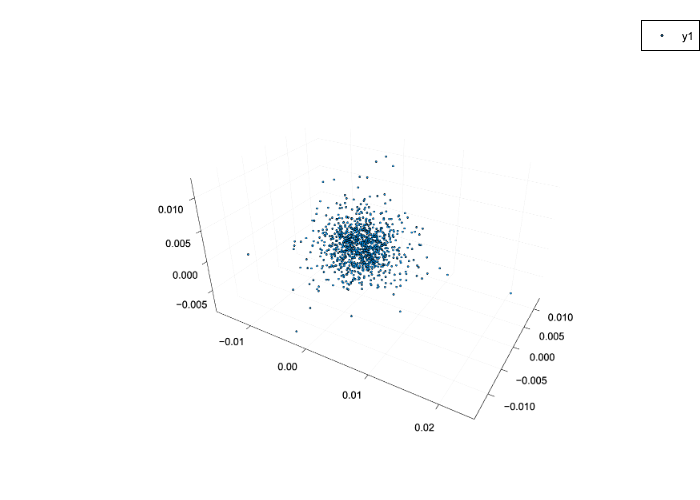

In [171]:
diffdata = r.x[:,1:1000:end]

dms = diffusionmaps(diffdata, 3, alpha=1, sigma=[0.1,0.2,0.5])
scatter(dms[:,1], dms[:,2], dms[:,3], markersize = 0.5)

In [173]:
evals, evecs = eigs(r.Q, which=:SM);

In [174]:
plot(evecs[:,1:4].|>real)
plot!(r.classes, alpha=0.5);

In [293]:
cells = 10
boundary=[-ones(6) ones(6)] .* 1.2
center_full, A_full, cartesians, assign = spboxes(r.x, cells, boundary)

println("sparsity: $(size(A, 1))/$(cells^6)=$(size(A, 1)/(cells^6))")

sparsity: 14307/1000000=0.014307


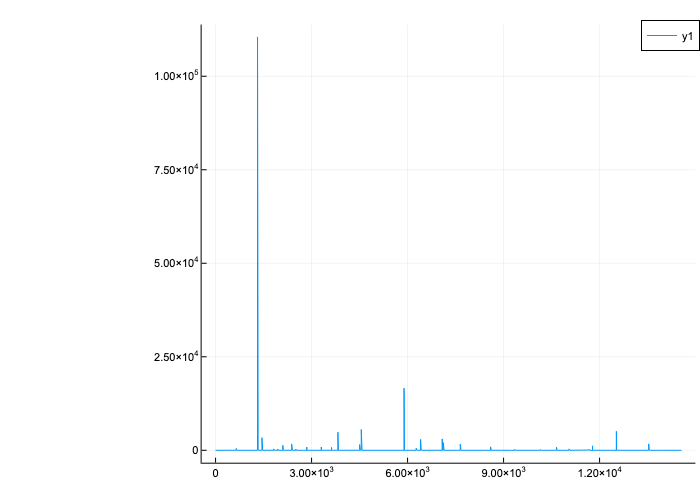

In [294]:
mins = [argmin(i->r.potential(r.x[:,i]), v) for v in values(assign)]
center_full = r.x[:,mins]
us_full = r.potential(center)

plot(us)

In [295]:
cutouts = unique([findall(us_full.>1); findall(sum(A_full, dims=1)|>vec .== 0)])
inds = ones(Bool, size(A_full, 1))
inds[cutouts] .= 0

@show size(cutouts)

A = A_full[inds, inds]
us = us_full[inds]
center = center_full[:,inds]

Q = sqra(us, A, r.beta);

size(cutouts) = (251,)


  0.005932 seconds (4.85 k allocations: 2.285 MiB)


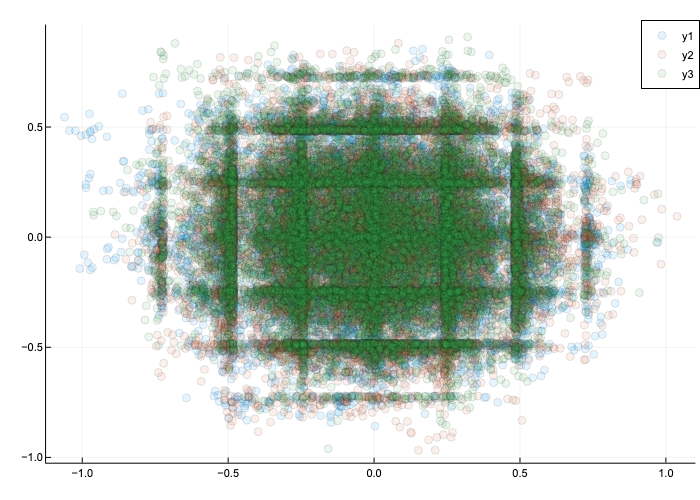

In [296]:
plot(); @time plot_trajectories(center, alpha=0.1)

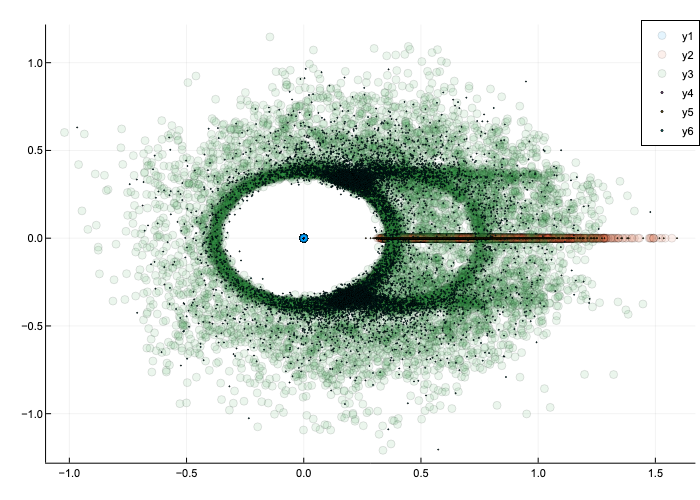

In [297]:
plot()
plot_trajectories(normalform(center), alpha=0.1)
plot_trajectories(normalform(r.x[:,1:100:end]), alpha=1, markersize=0.5)

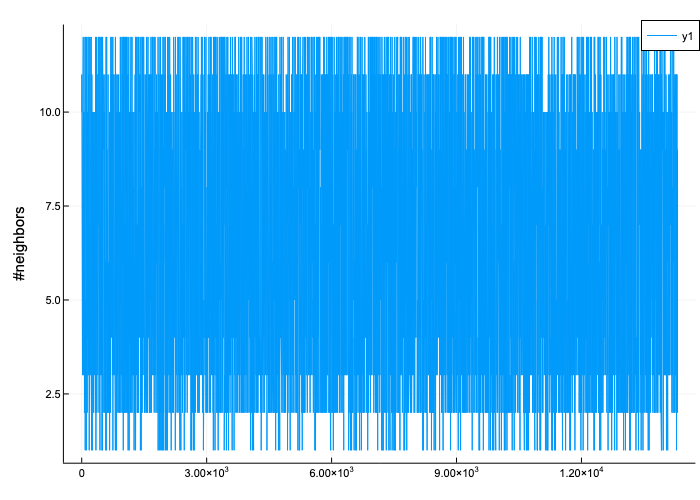

In [298]:
plot(sum(A, dims=1)|>vec, ylabel="#neighbors")

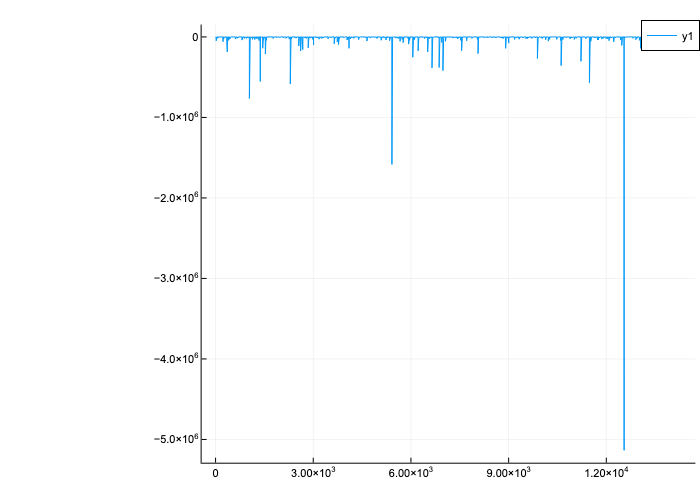

In [299]:
plot(diag(Q))

In [312]:
prob = argmin(diag(Q))

12547

In [313]:
@show Q[prob,:]
neighs = Q[prob,:].nzind;

Q[prob, :] =   [819  ]  =  6.40956e5
  [3789 ]  =  5.01873e5
  [4350 ]  =  5.57561e5
  [7780 ]  =  1.08934e6
  [7963 ]  =  6.88307e5
  [9267 ]  =  8.53129e5
  [12547]  =  -5.13462e6
  [13534]  =  8.03454e5


In [314]:
@show us[prob]
us[neighs]

us[prob] = 0.6730745540518709


8-element Vector{Float64}:
 -2.6696044311426914
 -2.608450904848854
 -2.6347573041101566
 -2.8021956665454546
 -2.687423153592293
 -2.741091887892404
  0.6730745540518709
 -2.726094380096364

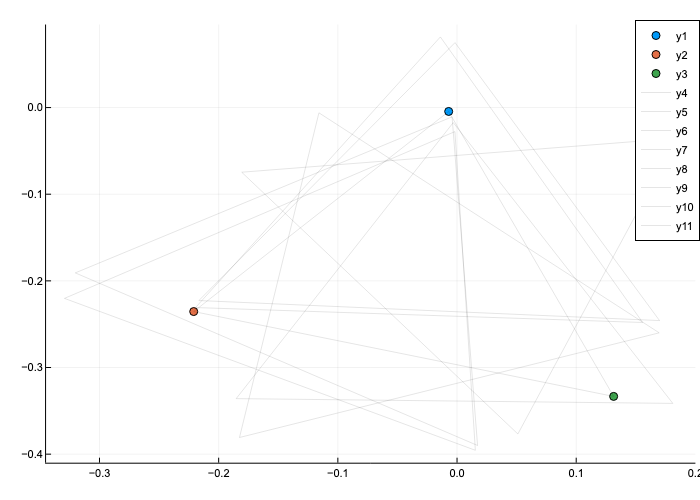

In [315]:
plot(); plot_trajectories(center[:,prob])
plot_triangles!(center[:, neighs], color=:black, alpha=0.1)

In [316]:
@show size(Q)
rank(Q)

size(Q) = (14307, 14307)


14305

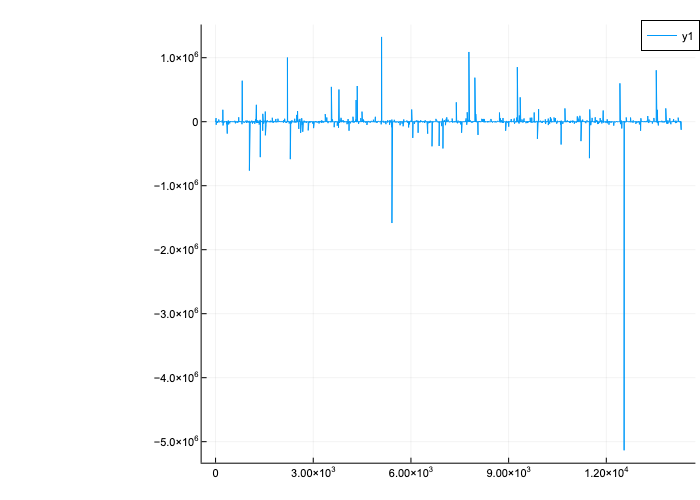

In [317]:
plot(sum(Q, dims=1)|>vec)

In [318]:
evals, evecs = eigs(Q, which=:SM)
evecs = real.(evecs)

LoadError: SingularException(0)

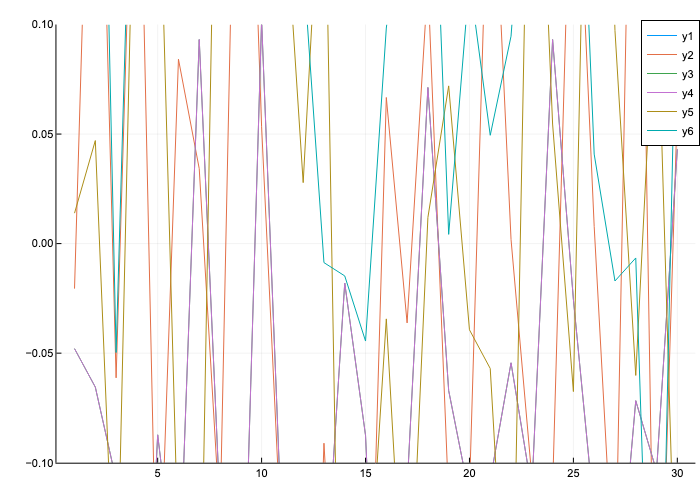

In [319]:
plot(real.(evecs), ylims=(-.1,.1))

In [320]:
step=5
evec = 4
col = real.(evecs[:,evec])[1:step:end]
data = center[:,1:step:end]
plot(); 
plot_trajectories(normalform(data), alpha=0.3, marker_z=col, clims=0.1.*(-1,1).*std(col), seriescolor=:bwr) |> display

scatter(data[1,:], data[2,:], alpha=0.3, marker_z=col, clims=0.1.*(-1,1).*std(col), seriescolor=:bwr)

LoadError: BoundsError: attempt to access 6-element Vector{Float64} at index [7]